In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [55]:
file1 = "listings_2019.csv"
file5 = "listings_2018.csv"
file6 = "listings_2017.csv"
file7 = "listings_2016.csv"
file8 = "listings_2015.csv"
listings = pd.read_csv(file1)
listings_2018 = pd.read_csv(file5, low_memory=False)
listings_2017 = pd.read_csv(file6, low_memory=False)
listings_2016 = pd.read_csv(file7, low_memory=False)
listings_2015 = pd.read_csv(file8, low_memory=False)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20191014170858,2019-10-14,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a day,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,2 months ago,t,3,8,16,85,2019-10-14,217,52,2009-07-23,2019-09-21,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,20191014170858,2019-10-14,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI don’t allow check ...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",Airbnb has no default house rules that hosts c...,NaN,NaN,https://a0.muscache.com/im/pictures/b6e97d2a-1...,NaN,4921,https://www.airbnb.com/users/show/4921,Kevin,2008-12-08,"San Francisco, California, United States",I am a retired software developer now raising .

In [56]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [57]:
pd.set_option('display.max_columns', None)

In [58]:
#Cleaning Columns
listings1 = listings.drop(['listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered',
                           'neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url',
                           'medium_url','picture_url','xl_picture_url','thumbnail_url','medium_url','xl_picture_url',
                           'host_acceptance_rate','host_thumbnail_url','neighbourhood_group_cleansed','square_feet',
                           'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','require_guest_profile_picture','host_about',
                           'host_response_time','host_response_rate','host_picture_url','host_verifications','host_has_profile_pic',
                           'market','smart_location','country_code','country','require_guest_phone_verification','bed_type',
                           'amenities','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                           'review_scores_communication','review_scores_location','review_scores_value','requires_license',
                           'jurisdiction_names','license','is_business_travel_ready'],axis=1)

In [59]:
# Removing Null values
values = {'weekly_price': 0, 'monthly_price': 0, 'security_deposit': 0, 'cleaning_fee': 0, 'review_scores_rating': 0,
          'reviews_per_month': 0}
listings1.fillna(value=values).head(2)

,id,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",t,Duboce Triangle,1.0,1.0,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,2 months ago,t,3,8,16,85,2019-10-14,217,52,2009-07-23,2019-09-21,97.0,f,moderate,1,1,0,0,1.74
1,3850,4921,https://www.airbnb.com/users/show/4921,Kevin,2008-12-08,"San Francisco, California, United States",t,Inner Sunset,2.0,2.0,t,"San Francisco, CA, United States",Inner Sunset,Inner Sunset,San Francisco,CA,94131,37.75402,-122.45805,t,House,Private room,2,1.0,1.0,1.0,$99.00,0,0,$0.00,$10.00,2,$20.00,1,5,3 days ago,t,5,32,62,62,2019-10-14,160,36,2009-07-16,2019-09-30,94.0,f,strict_14_with_grace_period,3,0,3,0,1.28


Entire home percentage: 58%
Private room percentage: 35%
Shared room percentage: 2%


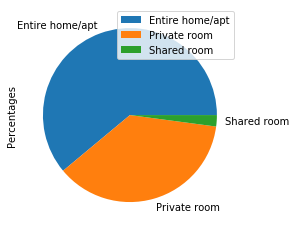

In [60]:
t = listings['room_type'].count()
x = listings.loc[listings['room_type']=='Entire home/apt']
y = listings.loc[listings['room_type']=='Private room']
z = listings.loc[listings['room_type']=='Shared room']
per_entire_home = int(x['room_type'].count()/t*100)
per_private = int(y['room_type'].count()/t*100)
per_shared = int(z['room_type'].count()/t*100)
xx = [per_entire_home,per_private,per_shared]
df = pd.DataFrame({'Percentages':[per_entire_home,per_private,per_shared]},
                  index=['Entire home/apt','Private room','Shared room'])
df.plot(kind='pie',subplots=True)
print(f'Entire home percentage: {per_entire_home}%')
print(f'Private room percentage: {per_private}%')
print(f'Shared room percentage: {per_shared}%')

In [61]:
# Calculating host with multiple listings
top_10_host = listings1.groupby(by="host_name").count()[["id"]].sort_values(by="id",ascending=False).rename(columns={"id":"Number of listings"}).reset_index()
c = top_10_host['Number of listings']>1
c.value_counts()

False    1175
True      997
Name: Number of listings, dtype: int64

In [62]:
# Hosts with most reviews
top_host_reviews= listings1.groupby(by="host_name")['number_of_reviews'].mean().sort_values(ascending=False)
top_host_reviews.head(10)

host_name
Michael And Yesica        647.5
Ili & Javier              532.0
Elmer                     514.0
Gae                       511.0
Kepa                      507.0
Robert And Juan Carlos    479.0
Janaf                     459.0
Kevin & Esther            458.0
Vanick                    442.0
Brenda                    414.0
Name: number_of_reviews, dtype: float64

In [63]:
x = listings1.loc[listings['host_name']=='Michael And Yesica']

In [64]:
high_listings_availability=listings1.loc[listings1["availability_365"]>90]
x=(high_listings_availability["host_id"].count())

low_listings_availability=listings1.loc[listings1["availability_365"]<=90]
y=(low_listings_availability["host_id"].count())

z=listings1["host_id"].count()

percentage_high_listings= x/z * 100 
percentage_low_listings= y/z * 100

print(f'Percentage availability more 90 days/year- {percentage_high_listings}%')
print(f'Percentage availability less 90 days/year- {percentage_low_listings}%')

Percentage availability more 90 days/year- 56.133645666378996%
Percentage availability less 90 days/year- 43.86635433362101%


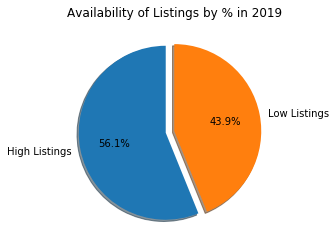

In [65]:
sizes = [56.13,43.87]
explode = (0.1,0)
labels= 'High Listings','Low Listings'
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Availability of Listings by % in 2019")
plt.savefig("Availability of Listings by % in 2019.png")

In [66]:
top_superhost = listings1.groupby(["host_name","host_is_superhost"]).count()[["id"]].sort_values(by="id",ascending=False).reset_index()

In [67]:
top_superhost[:11].iplot(kind='bar',x='host_name',y='id',
                         title='Top hosts and number of listings',
                         xTitle='Hosts',yTitle='Number of listings')

In [68]:
listings2 = listings1[['host_id','price','room_type','availability_365','neighbourhood_cleansed']]

In [69]:
pd.set_option('mode.chained_assignment', None)
listings2['price'] = listings2['price'].map(lambda x: x.lstrip('')[1:])
def convert_to_int(price):
    try:
        return float(price.replace(",",""))
    except:
        return float(price)
    
listings2["price"] = listings2["price"].apply(convert_to_int)   
listings2.head()

,host_id,price,room_type,availability_365,neighbourhood_cleansed
0,1169,170.0,Entire home/apt,85,Western Addition
1,4921,99.0,Private room,62,Inner Sunset
2,8904,235.0,Entire home/apt,0,Bernal Heights
3,21994,65.0,Private room,365,Haight Ashbury
4,21994,65.0,Private room,365,Haight Ashbury


In [70]:
price_nbhd = listings2.groupby(by='neighbourhood_cleansed')[['price']].median().sort_values(by='price',ascending=False).reset_index().rename(columns={'neighbourhood_cleansed':'Neighbourhoods','price':'Price'})

In [71]:
price_nbhd[:11].iplot(kind='bar',x='Neighbourhoods',y='Price',
                         title='Average price/night for each Neighbourhood',
                         xTitle='Neighbourhoods',yTitle='Price($)')

In [72]:
#Data for 2019   
price_mean_19 = listings2.loc[listings2['room_type']=='Entire home/apt']['price'].mean()
price_mean1_19 = listings2.loc[listings2['room_type']=='Private room']['price'].mean()
price_mean2_19 = listings2.loc[listings2['room_type']=='Shared room']['price'].mean()

av_mean_19 = listings2.loc[listings2['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_19 = listings2.loc[listings2['room_type']=='Private room']['availability_365'].mean()
av_mean2_19 = listings2.loc[listings2['room_type']=='Shared room']['availability_365'].mean()

In [73]:
#Data for 2018
listings_2018.fillna(0)
listings_2018['price'] = listings_2018['price'].map(lambda x: x.lstrip('')[1:])
listings_2018["price"] = listings_2018["price"].apply(convert_to_int)

price_mean_18 = listings_2018.loc[listings_2018['room_type']=='Entire home/apt']['price'].mean()
price_mean1_18 = listings_2018.loc[listings_2018['room_type']=='Private room']['price'].mean()
price_mean2_18 = listings_2018.loc[listings_2018['room_type']=='Shared room']['price'].mean()

av_mean_18 = listings_2018.loc[listings_2018['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_18 = listings_2018.loc[listings_2018['room_type']=='Private room']['availability_365'].mean()
av_mean2_18 = listings_2018.loc[listings_2018['room_type']=='Shared room']['availability_365'].mean()
print(price_mean_18)

264.89349519010534


In [74]:
#Data for 2017
listings_2017.fillna(0)
listings_2017['price'] = listings_2017['price'].map(lambda x: x.lstrip('')[1:])
listings_2017["price"] = listings_2017["price"].apply(convert_to_int)

price_mean_17 = listings_2017.loc[listings_2017['room_type']=='Entire home/apt']['price'].mean()
price_mean1_17 = listings_2017.loc[listings_2017['room_type']=='Private room']['price'].mean()
price_mean2_17 = listings_2017.loc[listings_2017['room_type']=='Shared room']['price'].mean()

av_mean_17 = listings_2017.loc[listings_2017['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_17 = listings_2017.loc[listings_2017['room_type']=='Private room']['availability_365'].mean()
av_mean2_17 = listings_2017.loc[listings_2017['room_type']=='Shared room']['availability_365'].mean()

In [75]:
#Data for 2016
listings_2016.fillna(0)
listings_2016['price'] = listings_2016['price'].map(lambda x: x.lstrip('')[1:])
listings_2016["price"] = listings_2016["price"].apply(convert_to_int)

price_mean_16 = listings_2016.loc[listings_2016['room_type']=='Entire home/apt']['price'].mean()
price_mean1_16 = listings_2016.loc[listings_2016['room_type']=='Private room']['price'].mean()
price_mean2_16 = listings_2016.loc[listings_2016['room_type']=='Shared room']['price'].mean()

av_mean_16 = listings_2016.loc[listings_2016['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_16 = listings_2016.loc[listings_2016['room_type']=='Private room']['availability_365'].mean()
av_mean2_16 = listings_2016.loc[listings_2016['room_type']=='Shared room']['availability_365'].mean()


In [76]:
#Data for 2015
listings_2015.fillna(0)
listings_2015['price'] = listings_2015['price'].map(lambda x: x.lstrip('')[1:])
listings_2015["price"] = listings_2015["price"].apply(convert_to_int)

price_mean_15 = listings_2015.loc[listings_2015['room_type']=='Entire home/apt']['price'].mean()
price_mean1_15 = listings_2015.loc[listings_2015['room_type']=='Private room']['price'].mean()
price_mean2_15 = listings_2015.loc[listings_2015['room_type']=='Shared room']['price'].mean()

av_mean_15 = listings_2015.loc[listings_2015['room_type']=='Entire home/apt']['availability_365'].mean()
av_mean1_15 = listings_2015.loc[listings_2015['room_type']=='Private room']['availability_365'].mean()
av_mean2_15 = listings_2015.loc[listings_2015['room_type']=='Shared room']['availability_365'].mean()


Text(0, 0.5, 'Price')

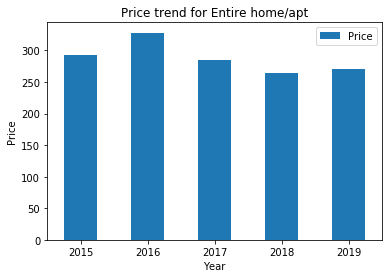

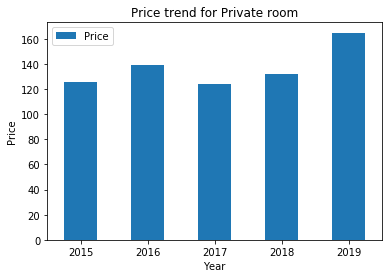

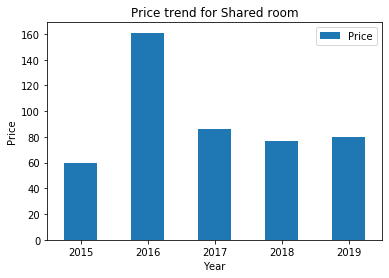

In [77]:
df_entire_home_apt = pd.DataFrame({'Price':[int(price_mean_15),int(price_mean_16),int(price_mean_17),int(price_mean_18),int(price_mean_19)],
                        'Availability':[int(av_mean_15),int(av_mean_16),int(av_mean_17),int(av_mean_18),int(av_mean_19)]})
df_private_room = pd.DataFrame({'Price':[int(price_mean1_15),int(price_mean1_16),int(price_mean1_17),int(price_mean1_18),int(price_mean1_19)],
                        'Availability':[av_mean1_15,av_mean1_16,av_mean1_17,av_mean1_18,int(av_mean1_19)]})
df_shared_room = pd.DataFrame({'Price':[int(price_mean2_15),int(price_mean2_16),int(price_mean2_17),int(price_mean2_18),int(price_mean2_19)],
                        'Availability':[av_mean2_15,av_mean2_16,av_mean2_17,av_mean2_18,int(av_mean2_19)]})

ax = df_entire_home_apt.plot(kind = 'bar', y='Price',rot=0, title= 'Price trend for Entire home/apt')
ax1= df_private_room.plot(kind ='bar', y='Price', rot=0,title= 'Price trend for Private room')
ax2= df_shared_room.plot(kind ='bar', y='Price', rot=0,title= 'Price trend for Shared room')
# , y='Availability'
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
ax1.set_xticklabels(['2015','2016','2017','2018','2019'])
ax2.set_xticklabels(['2015','2016','2017','2018','2019'])
ax.set_xlabel('Year')
ax1.set_xlabel('Year')
ax2.set_xlabel('Year')
ax.set_ylabel('Price')
ax1.set_ylabel('Price')
ax2.set_ylabel('Price')